In [1]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


# 이미지 리사이즈

In [2]:
import os
def resize_images(img_path):
    images=glob.glob(img_path+"/*.jpg")
    
    print(len(images), "images to be resized")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")
    
image_dir_path=os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1000 images to be resized
1000  images resized.
가위 이미지 resize 완료!


In [3]:
import os
def resize_images(img_path):
    images=glob.glob(img_path+"/*.jpg")
    
    print(len(images), "images to be resized")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")
    
image_dir_path=os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1000 images to be resized
1000  images resized.
바위 이미지 resize 완료!


In [4]:
import os
def resize_images(img_path):
    images=glob.glob(img_path+"/*.jpg")
    
    print(len(images), "images to be resized")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")
    
image_dir_path=os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1000 images to be resized
1000  images resized.
보 이미지 resize 완료!


이미지 리사이즈 과정
glob를 통해 파일을 가져옴/ 안티앨리어싱 = 이미지의 계단현상을 최소화할때 사용

# 데이터 불러오기 및 라벨링

In [5]:
import numpy as np

def load_data(img_path, number_of_data=3000):
    
    img_size=28
    color=3
    
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img=np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img=np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1
        idx=idx+1
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img=np.array(Image.open(file), dtype =np . int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

image_dir_path=os.getenv("HOME")+"/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (3000, 28, 28, 3)
y_train shape: (3000,)


이미지사이즈가 28\*28이 맞는지 확인
x트레인과 y트레인 셰이프 값이 존재하는지 테스트

# 이미지출력+ 라벨확인

라벨:  0


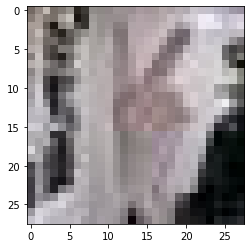

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

matplotlib는 도표나 그래프를 만들때 사용하는 줄 알았는데, 파일을 열 때도 사용가능

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(x_train.shape)
print(y_train.shape)

(3000, 28, 28, 3)
(3000,)


# 1-2

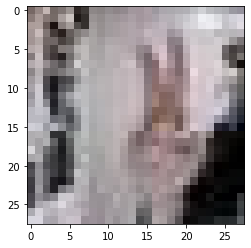

In [8]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [9]:
print(y_train[1])

0


라벨값이 잘 붙는지 확인

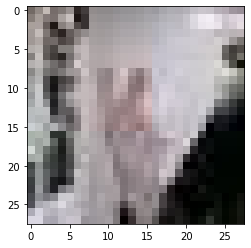

281 번째 이미지의 숫자는 바로  0 입니다.


In [10]:
index=280    
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

# 데이터 전처리

In [11]:
print('최소값:',np.min(x_train), '최대값:',np.max(x_train))

최소값: 0 최대값: 255


In [12]:
x_train_norm = x_train/255.0
print('최소값:',np.min(x_train_norm), '최대값:',np.max(x_train_norm))

최소값: 0.0 최대값: 1.0


인공지능 모델을 훈련시킬때 0~1 사이의 값으로 정규화 시키는 것을 권장

# 1-3

In [13]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3),activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print("Model에 추가된 Layer 개수: ", len(model.layers))

Model에 추가된 Layer 개수:  7


인풋셰이프에서 28\*28, 3컬러 명시./ 첫번째 Dense의 값 변경을통해 인식률 상승이 가능
두번째 Dense는 총 몇 개의 값을 가지고 있는지를 적는 것
relu = 0까지의 값만 표시하고 음수의 값은 표시하지 않을 때 사용.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12816     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 5

# 1-4

In [15]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

x_train_res=x_train_norm.reshape(-1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_res.shape))


Before Reshape - x_train_norm shape: (3000, 28, 28, 3)
After Reshape - x_train_reshaped shape: (3000, 28, 28, 3)


In [16]:
model.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_res, y_train, epochs=10)

Epoch 1/10
94/94 [==============================] - 3s 4ms/step - loss: 1.0747 - accuracy: 0.3820
Epoch 2/10
94/94 [==============================] - 0s 3ms/step - loss: 0.8209 - accuracy: 0.6590
Epoch 3/10
94/94 [==============================] - 0s 3ms/step - loss: 0.3177 - accuracy: 0.9093
Epoch 4/10
94/94 [==============================] - 0s 3ms/step - loss: 0.1654 - accuracy: 0.9537
Epoch 5/10
94/94 [==============================] - 0s 3ms/step - loss: 0.1016 - accuracy: 0.9690
Epoch 6/10
94/94 [==============================] - 0s 3ms/step - loss: 0.0699 - accuracy: 0.9790
Epoch 7/10
94/94 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9843
Epoch 8/10
94/94 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9887
Epoch 9/10
94/94 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9917
Epoch 10/10
94/94 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9953


optimizer의 Adam을 다른 값으로 변경시키거나, 에포치를 증가시키는 것으로 좋은 값을 얻을 가능성이 있음

# 1-5 테스트

In [17]:
import os
def resize_images(img_path):
    images=glob.glob(img_path+"/*.jpg")
    
    print(len(images), "images to be resized")
    
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")
    
image_dir_path=os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 테스트 이미지 resize 완료!")

100 images to be resized
100  images resized.
바위 테스트 이미지 resize 완료!


In [18]:
import os
def resize_images(img_path):
    images=glob.glob(img_path+"/*.jpg")
    
    print(len(images), "images to be resized")
    
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")
    
image_dir_path=os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 테스트 이미지 resize 완료!")

100 images to be resized
100  images resized.
보 테스트 이미지 resize 완료!


In [19]:
import os
def resize_images(img_path):
    images=glob.glob(img_path+"/*.jpg")
    
    print(len(images), "images to be resized")
    
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")
    
image_dir_path=os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 테스트 이미지 resize 완료!")

100 images to be resized
100  images resized.
가위 테스트 이미지 resize 완료!


# 테스트 이미지도 리사이즈 필수

In [20]:
image_dir_path=os.getenv("HOME")+"/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 300)

print(x_test.shape)


학습데이터(x_train)의 이미지 개수는 300 입니다.
(300, 28, 28, 3)


In [21]:
print('최소값:',np.min(x_test), ' 최대값:',np.max(x_test))

최소값: 0  최대값: 216


In [22]:
x_test_norm = x_test / 255.0
print('최소값:',np.min(x_test_norm), ' 최대값:',np.max(x_test_norm))

최소값: 0.0  최대값: 0.8470588235294118


### 테스트 자료도 정규화 해줄 것

In [23]:
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_test_res=x_test_norm.reshape(-1, 28, 28, 3)

print("After Reshape - x_test_reshaped shape: {}".format(x_test_res.shape))

Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


In [24]:
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


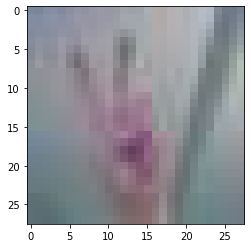

In [25]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [26]:
print(y_test[1])

0


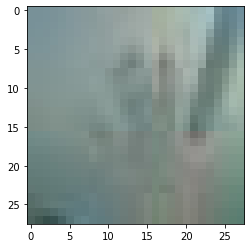

281 번째 이미지의 숫자는 바로  2 입니다.


In [27]:
index=280    
plt.imshow(x_test[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_test[index], '입니다.')

In [28]:
test_loss, test_accuracy = model.evaluate(x_test_res,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.9110 - accuracy: 0.6167
test_loss: 0.9109731316566467 
test_accuracy: 0.6166666746139526


loss값과 정확도를 나타낼 때 evaluate를 사용함.

verbose를 1로 할 경우 진행상황을 나타낼 수 있다고 하지만, print가 너무 많이 찍혀서 지저분해 보일 수도 있음.